# 1. Importar as Bibliotecas

In [525]:
# Importar as Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle

from sklearn.metrics import r2_score, accuracy_score, recall_score, f1_score, mean_squared_error, precision_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix


# 2. Carregamento e Exploração Inicial de Dados

In [533]:
# Importar os dados

try:
    data = pd.read_csv('Churn.csv')
except:
    df = pd.read_csv('/datasets/Churn.csv')

display(data.head(5))
print()
print(data.describe().T)
print()
print('Dados duplicados:', data.duplicated().sum())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0



                   count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure            9091.0  4.997690e+00      2.894723         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
Exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00  
CustomerId       15628528.

**Os dados fornecidos apresentam 14 colunas para descrever o comportamento dos clientes. Existem algumas colunas que são desnecessárias para o projeto de treinamento e que podemos retirar do nosso projeto sem perdas para o modelo: 'RowNumber', 'Surname', 'CustomerId'.**

**A coluna 'Tenure' é a única que apresenta dados ausentes. Iremos explorar para compreender melhor esses dados ausentes e verificar se podemos retirar esses valores sem maiores impactos no nosso modelo**

**Não há dados dupicados**

In [254]:
data_clean = data.drop(['RowNumber', 'Surname', 'CustomerId'], axis = 1)

data_clean

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [255]:
data_nan = data_clean[data_clean['Tenure'].isna()]

print('A proporção de dados ausentes é:', data_nan.shape[0]/data.shape[0]*100,'%')

A proporção de dados ausentes é: 9.09 %


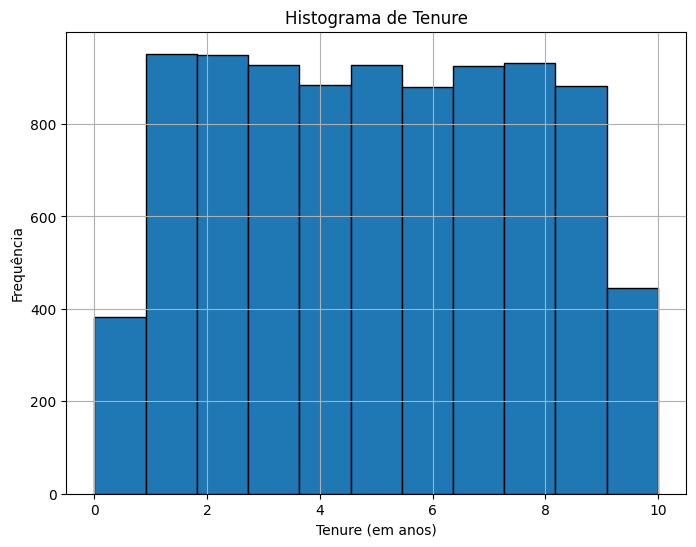

In [256]:
# Histograma de Tenure

plt.figure(figsize=(8,6))
plt.title('Histograma de Tenure')
plt.hist(data['Tenure'], bins = 11, edgecolor = 'black')
plt.xlabel('Tenure (em anos)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

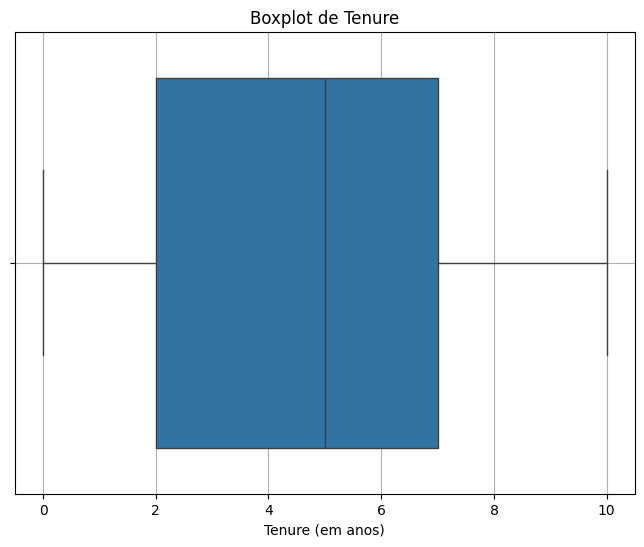

In [257]:
# Gráfico de Boxplot para Tenure

plt.figure(figsize=(8,6))
sns.boxplot(x=data['Tenure'])
plt.title('Boxplot de Tenure')
plt.xlabel('Tenure (em anos)')
plt.grid(True)
plt.show()

**O histograma e o boxplot apresentam distribuição uniforme dos dados, o que nos leva a crer que os dados ausentes poderiam ser excluidos da nossa análise ao invés de serem substituídos por valores de média ou mediana, para não criar vieses na nossa análise.**

In [258]:
data_clean = data_clean.dropna(subset='Tenure')

print('Quantidade de dados ausentes na coluna Tenure:', data_clean['Tenure'].isna().sum())
print('-'*60)
data_clean.info()

Quantidade de dados ausentes na coluna Tenure: 0
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 9091 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9091 non-null   int64  
 1   Geography        9091 non-null   object 
 2   Gender           9091 non-null   object 
 3   Age              9091 non-null   int64  
 4   Tenure           9091 non-null   float64
 5   Balance          9091 non-null   float64
 6   NumOfProducts    9091 non-null   int64  
 7   HasCrCard        9091 non-null   int64  
 8   IsActiveMember   9091 non-null   int64  
 9   EstimatedSalary  9091 non-null   float64
 10  Exited           9091 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 852.3+ KB


In [259]:
data_clean_dummies = pd.get_dummies(data_clean, columns=['Geography','Gender'], drop_first=True)

data_clean_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9091 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9091 non-null   int64  
 1   Age                9091 non-null   int64  
 2   Tenure             9091 non-null   float64
 3   Balance            9091 non-null   float64
 4   NumOfProducts      9091 non-null   int64  
 5   HasCrCard          9091 non-null   int64  
 6   IsActiveMember     9091 non-null   int64  
 7   EstimatedSalary    9091 non-null   float64
 8   Exited             9091 non-null   int64  
 9   Geography_Germany  9091 non-null   bool   
 10  Geography_Spain    9091 non-null   bool   
 11  Gender_Male        9091 non-null   bool   
dtypes: bool(3), float64(3), int64(6)
memory usage: 736.9 KB


**CONCLUSÕES DA SESSÃO:**

1. Os dados apresentavam 14 colunas originalmente, porém nem todas são úteis para a criação do nosso modelo de machine learning. Foram retiradas as colunas 'RowNumber', 'CostumerId' e 'Surname'.
2. Os dados são do tipo correto para a nossa análise, exceto para as colunas do tipo 'object' que serão modificadas.
3. Foi feita uma análise dos dados ausentes em Tenure. A análise não apontou nenhum padrão nos dados ausentes e a análise gráfica através do histograma e boxplot mostrou que não era interessante realizar a substituição dos valores pelo valor da mediana, pois poderia criar uma análise enviesada. Como os dados ausentes representavam 9.09% dos nossos dados, eles foram retirados da nossa análise.
4. Por fim, como os modelos de machine learning não recebem dados do tipo 'object' por isso as colunas 'Geography' e 'Gender' foram transformadas em 'dummies' utilizando a função 'get_dummies' da biblioteca pandas. Com isso, nossos dados estão prontos para serem utilizados nos modelos

# 2. Análise de Equilíbrio das Classes

## 2.1. Divisão dos dados em Treinamento e Teste

In [412]:
def plot_pie_chart(target, title, labels_class=('Ficou (0)', 'Saiu (1)')):
    """
    Função para plotar um gráfico de pizza mostrando a distribuição das classes com labels e porcentagens.
    
    Parâmetros:
    - target: pandas Series com as classes para plotar
    - labels_class: tupla com os nomes das classes no formato (classe_0, classe_1)
    - title: título do gráfico
    """
    # Obtendo os valores de value_counts e a porcentagem
    counts = target.value_counts().sort_index()
    labels = [f'{labels_class[0]}: {counts[0]}', f'{labels_class[1]}: {counts[1]}']
    
    # Plotando o gráfico de pizza
    plt.figure(figsize=(8,6))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
    plt.title(title)
    plt.show()

Exited
0    7237
1    1854
Name: count, dtype: int64


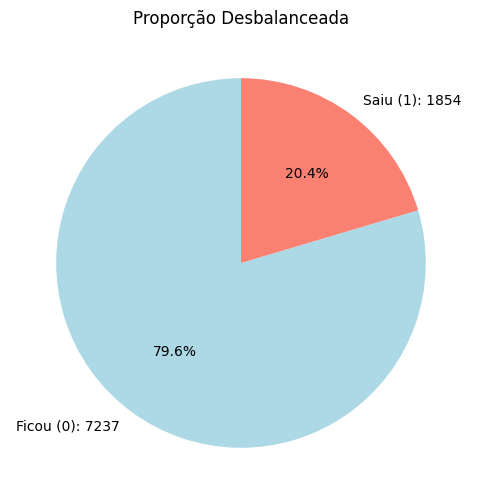

In [414]:
# Divisião de dados e Análise do target
features = data_clean_dummies.drop('Exited', axis = 1)
target = data_clean_dummies['Exited']

print(target.value_counts())

plot_pie_chart(target, 'Proporção Desbalanceada')

**Como é possível observar, há um desbalanceamento de dados que é necessário ser tratado. Em um primeiro momento não iremos fazer isso para avaliar como os modelos evoluem conforme são realizadas as modificações necessárias**

In [446]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=123)
features_train, features_test, target_train, target_test = train_test_split(features_train,target_train,test_size = 0.33,random_state = 123
)
print('Porcentagem de features_train:', f'{features_train.shape[0]/features.shape[0]:.0%}')
print('Porcentagem de features_valid:', f'{features_valid.shape[0]/ features.shape[0]:.0%}')
print('Porcentagem de feature_test:', f'{features_test.shape[0]/ features.shape[0]:.0%}')
print('Porcentagem de target_train:', f'{target_train.shape[0]/ target.shape[0]:.0%}')
print('Porcentagem de target_valid:', f'{target_valid.shape[0]/target.shape[0]:.0%}')
print('Porcentagem de target_test:', f'{target_test.shape[0]/ target.shape[0]:.0%}')

Porcentagem de features_train: 50%
Porcentagem de features_valid: 25%
Porcentagem de feature_test: 25%
Porcentagem de target_train: 50%
Porcentagem de target_valid: 25%
Porcentagem de target_test: 25%


**Os dados foram divididos na proporção 75:25 (Treino:Validação). Esses dados serão utilizados nos modelos para determinar qual o modelo que melhor se adequa ao problema**

In [447]:
def metrics_validation (target_value, predicted_value):
    accuracy = accuracy_score(target_value, predicted_value)
    precision = precision_score(target_value, predicted_value)
    recall = recall_score(target_value, predicted_value)
    f1 = f1_score(target_value, predicted_value)

    print('O valor de acurácia do modelo é de:', accuracy)
    print('O valor de precisão do modelo é de:', precision)
    print('O valor de sensibilidade do modelo é de:', recall)
    print('O valor de f1 do modelo é de:', f1)

In [448]:
def find_best_dt_hyperparameters(weight, features_value, target_value, features_valid_value, target_valid_value, max_depth_range=(1, 21), min_samples_split_range=(2, 21), min_samples_leaf_range=(1, 21)):
    # Inicializando as melhores métricas
    best_f1_score_dt = 0
    best_max_depth = 0
    best_min_samples_split = 0
    best_min_samples_leaf = 0

    # Intervalos sugeridos para os hiperparâmetros
    for max_depth in range(*max_depth_range):  # Profundidade da árvore variando conforme o intervalo fornecido
        for min_samples_split in range(*min_samples_split_range):  # Número mínimo de amostras para dividir um nó
            for min_samples_leaf in range(*min_samples_leaf_range):  # Número mínimo de amostras em uma folha
                
                # Treinando o modelo com os hiperparâmetros atuais
                model_dt = DecisionTreeClassifier(random_state=12345, max_depth=max_depth,
                                                  min_samples_split=min_samples_split,
                                                  min_samples_leaf=min_samples_leaf,
                                                  class_weight=weight)
                model_dt.fit(features_value, target_value)
                
                # Fazendo predições no conjunto de validação
                predicted_valid_dt = model_dt.predict(features_valid_value)
                
                # Calculando o F1-score para o modelo
                f1_dt = f1_score(target_valid_value, predicted_valid_dt)
                
                # Comparando e salvando o melhor F1-score e os hiperparâmetros correspondentes
                if f1_dt > best_f1_score_dt:
                    best_f1_score_dt = f1_dt
                    best_max_depth = max_depth
                    best_min_samples_split = min_samples_split
                    best_min_samples_leaf = min_samples_leaf

    # Exibindo os melhores valores encontrados
    print(f"Melhor F1-score: {best_f1_score_dt}")
    print(f"Melhor max_depth: {best_max_depth}")
    print(f"Melhor min_samples_split: {best_min_samples_split}")
    print(f"Melhor min_samples_leaf: {best_min_samples_leaf}")
    
    # Retornando os melhores hiperparâmetros encontrados
    return {
        'best_f1_score': best_f1_score_dt,
        'best_max_depth': best_max_depth,
        'best_min_samples_split': best_min_samples_split,
        'best_min_samples_leaf': best_min_samples_leaf
    }

In [449]:
def find_best_rf_hyperparameters(weight, features_train_value, target_train_value, features_valid_value, target_valid_value, max_depth_range=(1, 21), n_estimators_range=(1, 51)):
    # Inicializando as melhores métricas
    best_f1_rf = 0
    best_n_estimators = 0
    best_max_depth = 0

    # Intervalos para max_depth e n_estimators
    for max_depth in range(*max_depth_range):
        for n_estimators in range(*n_estimators_range):
            
            # Treinando o modelo com os hiperparâmetros atuais
            model_rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=12345, class_weight=weight)
            model_rf.fit(features_train_value, target_train_value)
            
            # Fazendo predições no conjunto de validação
            predictions_valid_rf = model_rf.predict(features_valid_value)
            
            # Calculando o F1-score
            f1_rf = f1_score(target_valid_value, predictions_valid_rf)
            
            # Comparando e salvando o melhor F1-score e os hiperparâmetros correspondentes
            if f1_rf > best_f1_rf:
                best_f1_rf = f1_rf
                best_n_estimators = n_estimators
                best_max_depth = max_depth

    # Exibindo os melhores valores encontrados
    print(f"Melhor n_estimators: {best_n_estimators}")
    print(f"Melhor max_depth: {best_max_depth}")
    print(f"Melhor F1-score: {best_f1_rf}")

    # Retornando os melhores hiperparâmetros
    return {
        'best_f1_score': best_f1_rf,
        'best_n_estimators': best_n_estimators,
        'best_max_depth': best_max_depth
    }

In [450]:
def plot_class_distribution(counts_lr, counts_lr_blcd, counts_lr_upr, counts_lr_und):
    # Dados para os gráficos
    methods = ['Desbalanceada', 'class_weight', 'Superamostragem', 'Subamostragem']
    counts_0 = [counts_lr[0], counts_lr_blcd[0], counts_lr_upr[0], counts_lr_und[0]]  # Classe 0
    counts_1 = [counts_lr[1], counts_lr_blcd[1], counts_lr_upr[1], counts_lr_und[1]]  # Classe 1
    
    # Largura das barras
    bar_width = 0.35
    index = np.arange(len(methods))

    # Criando os gráficos de barras
    plt.figure(figsize=(10,6))

    # Barras para a classe 0
    plt.bar(index, counts_0, bar_width, label='Classe 0', color='lightblue')

    # Barras para a classe 1
    plt.bar(index + bar_width, counts_1, bar_width, label='Classe 1', color='salmon')

    # Adicionando labels e título
    plt.xlabel('Métodos de Balanceamento')
    plt.ylabel('Contagem de Previsões')
    plt.title('Distribuição das Previsões por Método de Balanceamento')

    # Adicionando os ticks e as labels
    plt.xticks(index + bar_width / 2, methods)

    # Adicionando legenda
    plt.legend()

    # Exibindo o gráfico
    plt.show()

## 2.2. Modelo de Regressão Logistica

In [451]:
model_lr = LogisticRegression(random_state=12345, solver='liblinear')
model_lr.fit(features_train, target_train)

predicted_valid_lr = model_lr.predict(features_valid)

metrics_validation(target_valid, predicted_valid_lr)

O valor de acurácia do modelo é de: 0.796304443466784
O valor de precisão do modelo é de: 0.5
O valor de sensibilidade do modelo é de: 0.0021598272138228943
O valor de f1 do modelo é de: 0.004301075268817204


## 2.2. Modelo de Árvore de Decisão

In [452]:
best_hyperparameters = find_best_dt_hyperparameters(None, features_train, target_train, features_valid, target_valid)

Melhor F1-score: 0.5879332477535302
Melhor max_depth: 8
Melhor min_samples_split: 9
Melhor min_samples_leaf: 2


In [453]:
# Treinando o modelo com os hiperparâmetros atuais
model_dt = DecisionTreeClassifier(random_state=12345, max_depth=8,
                                              min_samples_split=9,
                                              min_samples_leaf=2)
model_dt.fit(features_train, target_train)
            
# Fazendo predições no conjunto de validação
predicted_valid_dt = model_dt.predict(features_valid)

metrics_validation(target_valid, predicted_valid_dt)

O valor de acurácia do modelo é de: 0.858776946766388
O valor de precisão do modelo é de: 0.7246835443037974
O valor de sensibilidade do modelo é de: 0.4946004319654428
O valor de f1 do modelo é de: 0.5879332477535302


## 2.3. Modelo de Floresta Aleatória

In [454]:
best_rf_hyperparameters = find_best_rf_hyperparameters(None, features_train, target_train, features_valid, target_valid)

Melhor n_estimators: 12
Melhor max_depth: 11
Melhor F1-score: 0.5774278215223098


In [455]:
# Treinando o modelo com os hiperparâmetros atuais
model_rf = RandomForestClassifier(n_estimators=12, max_depth=11, random_state=12345, class_weight='balanced')
model_rf.fit(features_train, target_train)
            
# Fazendo predições no conjunto de validação
predictions_valid_rf = model_rf.predict(features_valid)

metrics_validation(target_valid, predictions_valid_rf)

O valor de acurácia do modelo é de: 0.8402991641003079
O valor de precisão do modelo é de: 0.6201923076923077
O valor de sensibilidade do modelo é de: 0.5572354211663066
O valor de f1 do modelo é de: 0.5870307167235495


**Nos modelos desbalanceados há uma alta acurácia de acertos de dados. O problema é que com os dados desbalanceados os modelos podem estar criando um viés de classificação. Isso é refletido nos valores de F1. No modelo de regressão logística isso fica mais claro do que nos outros modelos pois eles são mais robustos para essa análise. Para corrigir esse problema, é necessário balancear os dados de treinamento, o que vai ser feito no próximo tópico.**

# 3. Análise de Equilíbrio de Classes Balanceadas

## 3.1. Superamostragem

In [456]:
def upsample(features, target, repeat):

	# Divisão de dados
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
		
	# Multiplicação dos dados e criação de novas amostras
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
	
	# Embaralhar os dados
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

In [457]:
features_upsampled, target_upsampled = upsample(
    features_train, target_train, 4
)

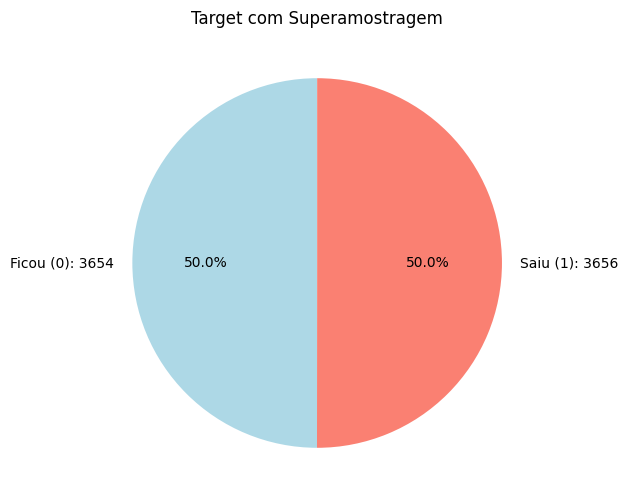

In [458]:
plot_pie_chart(target_upsampled, 'Target com Superamostragem')

## 3.2. Subamostragem

In [459]:
def downsample(features, target, fraction):
    # Divisão de dados
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

	# Criação das novas categorias 
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state = 12345)]
        +[features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state = 12345)]
        +[target_ones]
    )
		
	# Embaralha as amostras
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state = 12345)
    
    return features_downsampled, target_downsampled

In [460]:
features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.25
)

target_downsampled.value_counts()

Exited
1    914
0    914
Name: count, dtype: int64

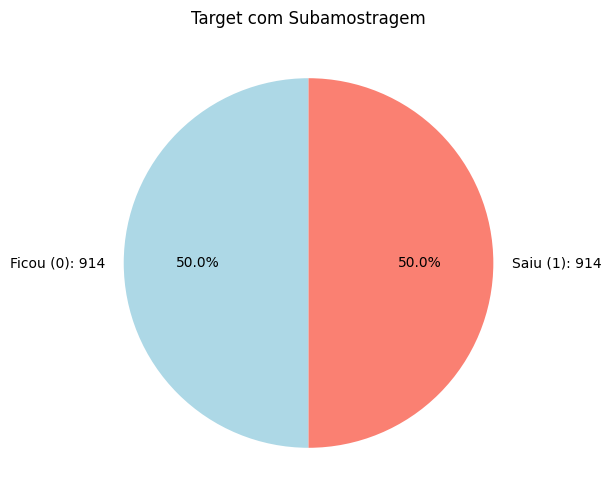

In [461]:
plot_pie_chart(target_downsampled, 'Target com Subamostragem')

**O novo arranjo de dados com superamostragem e subamostragem mostra uma divisão igualitária de dados de 50%:50% para o target. Isso pode reduzir o viés para a análise.**

## 3.2. Regressão Logistica Balanceada

### 3.2.1. Balanceamento por class_weight

In [462]:
model_logreg_blcd = LogisticRegression(random_state=12345, solver='liblinear',class_weight='balanced')
model_logreg_blcd.fit(features_train, target_train)

predicted_valid_lr_blcd = model_logreg_blcd.predict(features_valid)

metrics_validation(target_valid, predicted_valid_lr_blcd)

O valor de acurácia do modelo é de: 0.6836779586449626
O valor de precisão do modelo é de: 0.3580931263858093
O valor de sensibilidade do modelo é de: 0.6976241900647948
O valor de f1 do modelo é de: 0.47326007326007324


### 3.2.2. Balanceamento por superamostragem

In [463]:
model_logreg_upr = LogisticRegression(random_state=12345, solver='liblinear')
model_logreg_upr.fit(features_upsampled, target_upsampled)

predicted_valid_lr_upr = model_logreg_upr.predict(features_valid)

metrics_validation(target_valid, predicted_valid_lr_upr)

O valor de acurácia do modelo é de: 0.6599208095028597
O valor de precisão do modelo é de: 0.3333333333333333
O valor de sensibilidade do modelo é de: 0.6695464362850972
O valor de f1 do modelo é de: 0.44508255563531945


### 3.2.3. Balanceamento por Subamostragem

In [464]:
model_logreg_und = LogisticRegression(random_state=12345, solver='liblinear')
model_logreg_und.fit(features_downsampled, target_downsampled)

predicted_valid_lr_und = model_logreg_und.predict(features_valid)

metrics_validation(target_valid, predicted_valid_lr_und)

O valor de acurácia do modelo é de: 0.6555213374395072
O valor de precisão do modelo é de: 0.3279569892473118
O valor de sensibilidade do modelo é de: 0.6587473002159827
O valor de f1 do modelo é de: 0.4379038047379756


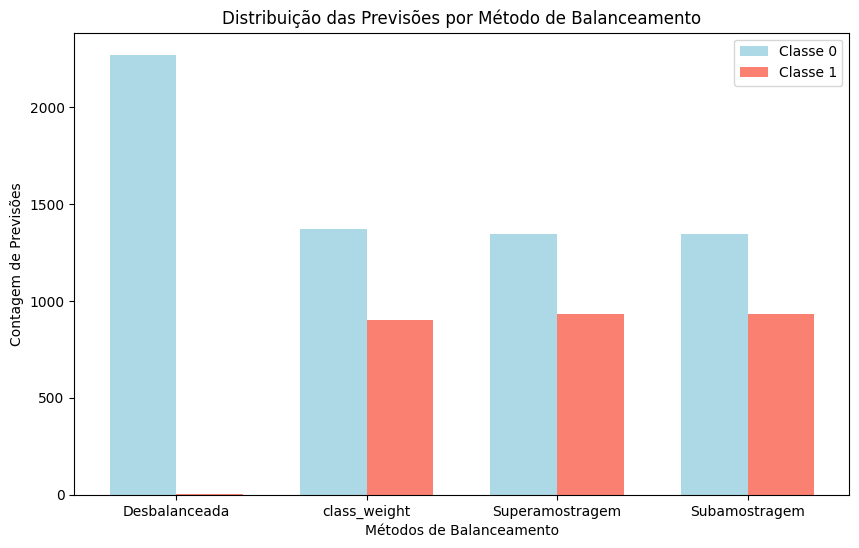

In [465]:
counts_lr=Counter(predicted_valid_lr)
counts_lr_blcd=Counter(predicted_valid_lr_blcd)
counts_lr_upr=Counter(predicted_valid_lr_upr)
counts_lr_und=Counter(predicted_valid_lr_und)

plot_class_distribution(counts_lr, counts_lr_blcd, counts_lr_upr, counts_lr_und)

## 3.3. Árvore de Decisão Balanceada

### 3.3.1. Árvore de Decisão Balanceada por class_weight

In [466]:
find_best_dt_hyperparameters('balanced', features_train, target_train, features_valid, target_valid)

Melhor F1-score: 0.5784114052953157
Melhor max_depth: 5
Melhor min_samples_split: 2
Melhor min_samples_leaf: 16


{'best_f1_score': np.float64(0.5784114052953157),
 'best_max_depth': 5,
 'best_min_samples_split': 2,
 'best_min_samples_leaf': 16}

In [467]:
# Treinando o modelo com os hiperparâmetros atuais
model_dt_blcd = DecisionTreeClassifier(random_state=12345, max_depth=5,
                                              min_samples_split=2,
                                              min_samples_leaf=16,
                                              class_weight='balanced')
model_dt_blcd.fit(features_train, target_train)
            
# Fazendo predições no conjunto de validação
predicted_valid_dt_blcd = model_dt_blcd.predict(features_valid)

metrics_validation(target_valid, predicted_valid_dt_blcd)

O valor de acurácia do modelo é de: 0.8178618565772108
O valor de precisão do modelo é de: 0.5472061657032755
O valor de sensibilidade do modelo é de: 0.6133909287257019
O valor de f1 do modelo é de: 0.5784114052953157


### 3.3.2. Árvore de Decisão Balanceada por superamostragem

In [468]:
find_best_dt_hyperparameters(None, features_upsampled, target_upsampled, features_valid, target_valid)

Melhor F1-score: 0.5883376849434291
Melhor max_depth: 9
Melhor min_samples_split: 2
Melhor min_samples_leaf: 19


{'best_f1_score': np.float64(0.5883376849434291),
 'best_max_depth': 9,
 'best_min_samples_split': 2,
 'best_min_samples_leaf': 19}

In [469]:
# Treinando o modelo com os hiperparâmetros atuais
model_dt_blcd_upr = DecisionTreeClassifier(random_state=12345, max_depth=9,
                                              min_samples_split=2,
                                              min_samples_leaf=19)
model_dt_blcd_upr.fit(features_upsampled, target_upsampled)
            
# Fazendo predições no conjunto de validação
predicted_valid_dt_upr = model_dt_blcd_upr.predict(features_valid)

metrics_validation(target_valid, predicted_valid_dt_upr)

O valor de acurácia do modelo é de: 0.7919049714034316
O valor de precisão do modelo é de: 0.49271137026239065
O valor de sensibilidade do modelo é de: 0.7300215982721382
O valor de f1 do modelo é de: 0.5883376849434291


### 3.3.3. Árvore de Decisão Balanceada por Subamostragem

In [501]:
find_best_dt_hyperparameters(None, features_downsampled, target_downsampled, features_valid, target_valid)

Melhor F1-score: 0.5543278084714549
Melhor max_depth: 3
Melhor min_samples_split: 2
Melhor min_samples_leaf: 1


{'best_f1_score': np.float64(0.5543278084714549),
 'best_max_depth': 3,
 'best_min_samples_split': 2,
 'best_min_samples_leaf': 1}

In [502]:
# Treinando o modelo com os hiperparâmetros atuais
model_dt_blcd_und = DecisionTreeClassifier(random_state=12345, max_depth=3,
                                              min_samples_split=2,
                                              min_samples_leaf=1)
model_dt_blcd_und.fit(features_downsampled, target_downsampled)
            
# Fazendo predições no conjunto de validação
predicted_valid_dt_und = model_dt_blcd_und.predict(features_valid)

metrics_validation(target_valid, predicted_valid_dt_und)

O valor de acurácia do modelo é de: 0.787065552133744
O valor de precisão do modelo é de: 0.48314606741573035
O valor de sensibilidade do modelo é de: 0.6501079913606912
O valor de f1 do modelo é de: 0.5543278084714549


## 3.4. Árvore Aleatória Balanceada

### 3.4.1. Árvore Aleatória Balanceada por class_weight

In [470]:
find_best_rf_hyperparameters('balanced', features_train, target_train, features_valid, target_valid)

Melhor n_estimators: 30
Melhor max_depth: 9
Melhor F1-score: 0.6184074457083765


{'best_f1_score': np.float64(0.6184074457083765),
 'best_n_estimators': 30,
 'best_max_depth': 9}

In [471]:
model_rf_blcd = RandomForestClassifier(n_estimators=30, 
                                      max_depth=9, 
                                      random_state=12345,
                                      class_weight='balanced')
model_rf_blcd.fit(features_train, target_train)
        
        
predictions_valid_rf_blcd = model_rf_blcd.predict(features_valid)

metrics_validation(target_valid, predictions_valid_rf_blcd)

O valor de acurácia do modelo é de: 0.8376594808622966
O valor de precisão do modelo é de: 0.5932539682539683
O valor de sensibilidade do modelo é de: 0.6457883369330454
O valor de f1 do modelo é de: 0.6184074457083765


### 3.4.2. Árvore Aleatória Balanceada por Superamostragem

In [472]:
find_best_rf_hyperparameters(None, features_upsampled, target_upsampled, features_valid, target_valid)

Melhor n_estimators: 45
Melhor max_depth: 9
Melhor F1-score: 0.6199813258636788


{'best_f1_score': np.float64(0.6199813258636788),
 'best_n_estimators': 45,
 'best_max_depth': 9}

In [473]:
model_rf_upr = RandomForestClassifier(n_estimators=45, 
                                      max_depth=9, 
                                      random_state=12345)
model_rf_upr.fit(features_upsampled, target_upsampled)
        
        
predictions_valid_rf_upr = model_rf_upr.predict(features_valid)

metrics_validation(target_valid, predictions_valid_rf_upr)

O valor de acurácia do modelo é de: 0.8209414870215574
O valor de precisão do modelo é de: 0.5460526315789473
O valor de sensibilidade do modelo é de: 0.7170626349892009
O valor de f1 do modelo é de: 0.6199813258636788


### 3.4.3. Árvore Aleatória Balanceada por Subamostragem

In [474]:
find_best_rf_hyperparameters(None, features_downsampled, target_downsampled, features_valid, target_valid)

Melhor n_estimators: 28
Melhor max_depth: 11
Melhor F1-score: 0.5942857142857143


{'best_f1_score': np.float64(0.5942857142857143),
 'best_n_estimators': 28,
 'best_max_depth': 11}

In [477]:
model_rf_und = RandomForestClassifier(n_estimators=28, 
                                      max_depth=11, 
                                      random_state=12345)
model_rf_und.fit(features_downsampled, target_downsampled)
        
        
predictions_valid_rf_und = model_rf_und.predict(features_valid)

metrics_validation(target_valid, predictions_valid_rf_und)

O valor de acurácia do modelo é de: 0.7813462384513858
O valor de precisão do modelo é de: 0.4776902887139108
O valor de sensibilidade do modelo é de: 0.7861771058315334
O valor de f1 do modelo é de: 0.5942857142857143


**Os testes dos modelos com dados balanceados mostra uma evolução nas métricas de análise. Percebe-se uma queda nos valores de acurácia pois os modelos deixam de possuir um padrão enviesado e os valores de precisão e sensibilidade são aumentados, o que se reflete no valor de F1. Os modelos de floresta aleatória são os que apresentam os melhores modelos e os modelos de regressão logística apresentaram os piores.** 

# 4. Análise AUC-ROC e Curva ROC dos modelos

In [503]:
def calculate_auc_roc(models, features_valid, target_valid):
    """
    Função para calcular o AUC-ROC de diferentes modelos.

    Parâmetros:
    - models: dicionário contendo os modelos treinados com diferentes estratégias de balanceamento
              (chaves devem ser strings como 'desbalanceado', 'class_weight', 'superamostragem').
    - features_valid: os dados de validação.
    - target_valid: os rótulos verdadeiros do conjunto de validação.
    
    Retorno:
    - auc_roc_scores: dicionário contendo os AUC-ROC para cada modelo.
    """

    auc_roc_scores = {}

    # Desbalanceado
    probabilities_valid = models['Desbalanceado'].predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc_scores['Desbalanceado'] = roc_auc_score(target_valid, probabilities_one_valid)

    # Balanceado com class_weight
    probabilities_valid_blcd = models['Balanceado CW'].predict_proba(features_valid)
    probabilities_one_valid_blcd = probabilities_valid_blcd[:, 1]
    auc_roc_scores['Balanceado CW'] = roc_auc_score(target_valid, probabilities_one_valid_blcd)

    # Superamostragem
    probabilities_valid_upr = models['Balanceado Superamostragem'].predict_proba(features_valid)
    probabilities_one_valid_upr = probabilities_valid_upr[:, 1]
    auc_roc_scores['Balanceado Superamostragem'] = roc_auc_score(target_valid, probabilities_one_valid_upr)

    # Superamostragem
    probabilities_valid_und = models['Balanceado Subamostragem'].predict_proba(features_valid)
    probabilities_one_valid_und = probabilities_valid_und[:, 1]
    auc_roc_scores['Balanceado Subamostragem'] = roc_auc_score(target_valid, probabilities_one_valid_und)

    # Exibindo os resultados
    print('Valor AUC-ROC para Desbalanceado:', auc_roc_scores['Desbalanceado'])
    print('Valor AUC-ROC para Balanceado com class_weight:', auc_roc_scores['Balanceado CW'])
    print('Valor AUC-ROC para Superamostragem:', auc_roc_scores['Balanceado Superamostragem'])
    print('Valor AUC-ROC para Subamostragem:', auc_roc_scores['Balanceado Subamostragem'])
    print('-' * 90)

    # Dicionário das Probabilidades
    probabilities = {'desbalanceado': probabilities_one_valid,
    'class_weight': probabilities_one_valid_blcd,
    'superamostragem': probabilities_one_valid_upr,
    'subamostragem': probabilities_one_valid_und
    }
    
    return auc_roc_scores, probabilities

In [498]:
def plot_roc_curve(models, probabilities, target_valid, model_labels, title):
    """
    Função para plotar a curva ROC para diferentes modelos.

    Parâmetros:
    - models: dicionário contendo os nomes dos modelos como chave e probabilidades da classe positiva como valor.
    - probabilities: dicionário com as probabilidades previstas para a classe positiva de cada modelo.
    - target_valid: os rótulos verdadeiros do conjunto de validação.
    - model_labels: lista de rótulos para os diferentes modelos a serem exibidos no gráfico.
    - title: título do gráfico.
    """
    plt.figure(figsize=(6,6))

    # Criando a curva ROC para cada modelo
    for model, probs, label in zip(models, probabilities, model_labels):
        fpr, tpr, _ = roc_curve(target_valid, probabilities[model])
        plt.plot(fpr, tpr, label=label)

    # Curva ROC para um modelo aleatório
    plt.plot([0, 1], [0, 1], linestyle='--', label='Modelo Aleatório')

    # Configurando limites dos eixos
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])

    # Nomeando os eixos
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')

    # Adicionando título ao gráfico
    plt.title(title)

    # Exibindo legenda
    plt.legend()

    # Exibindo o gráfico
    plt.show()

## 4.1. Regressão Logística

In [495]:
models = {'Desbalanceado': model_lr,
          'Balanceado CW': model_logreg_blcd,
          'Balanceado Superamostragem': model_logreg_upr,
          'Balanceado Subamostragem': model_logreg_und
}

auc_roc_score_lr, probabilities_lr = calculate_auc_roc(models, features_valid, target_valid)

Valor AUC-ROC para Desbalanceado: 0.6166724341610682
Valor AUC-ROC para Balanceado com class_weight: 0.7518191472858966
Valor AUC-ROC para Superamostragem: 0.6990024223476488
Valor AUC-ROC para Subamostragem: 0.6988389437132322
------------------------------------------------------------------------------------------


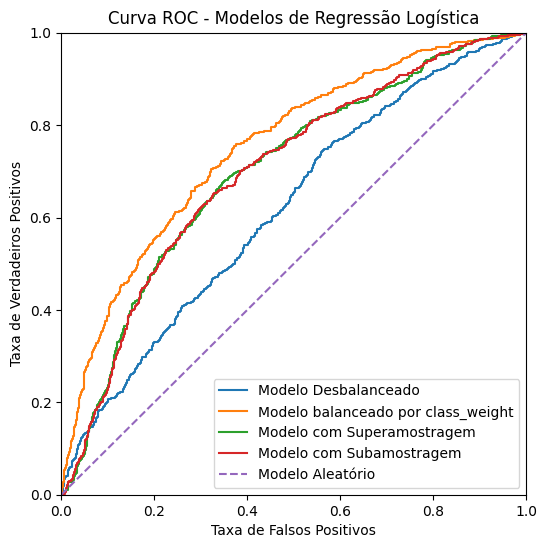

In [500]:
model_labels = ['Modelo Desbalanceado', 'Modelo balanceado por class_weight', 'Modelo com Superamostragem', 'Modelo com Subamostragem']

plot_roc_curve(models=probabilities_lr.keys(), probabilities=probabilities_lr, target_valid=target_valid, model_labels=model_labels, title = 'Curva ROC - Modelos de Regressão Logística')


## 4.2. Árvore de Decisão

In [505]:
models_dt = {'Desbalanceado': model_dt,
          'Balanceado CW': model_dt_blcd,
          'Balanceado Superamostragem': model_dt_blcd_upr,
          'Balanceado Subamostragem': model_dt_blcd_und
}

auc_roc_score_dt, probabilities_dt = calculate_auc_roc(models_dt, features_valid, target_valid)

Valor AUC-ROC para Desbalanceado: 0.8369658604107252
Valor AUC-ROC para Balanceado com class_weight: 0.8333150364545422
Valor AUC-ROC para Superamostragem: 0.8332679021037432
Valor AUC-ROC para Subamostragem: 0.8130788873906662
------------------------------------------------------------------------------------------


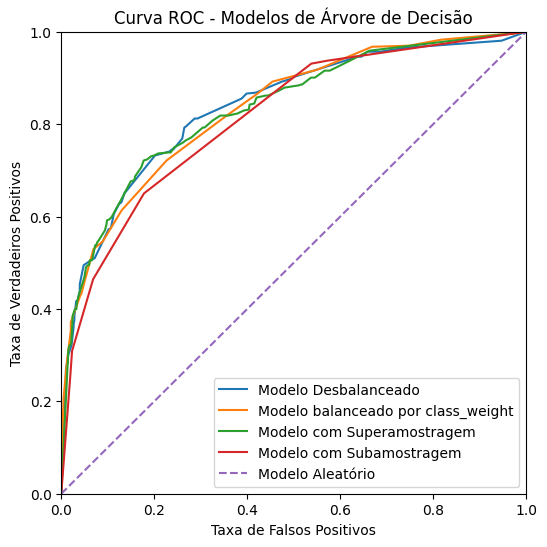

In [506]:
plot_roc_curve(models=probabilities_dt.keys(), probabilities=probabilities_dt, target_valid=target_valid, model_labels=model_labels, title = 'Curva ROC - Modelos de Árvore de Decisão')


## 4.3. Floresta Aleatória

In [507]:
models_rf = {'Desbalanceado': model_rf,
          'Balanceado CW': model_rf_blcd,
          'Balanceado Superamostragem': model_rf_upr,
          'Balanceado Subamostragem': model_rf_und
}

auc_roc_score_rf, probabilities_rf = calculate_auc_roc(models_rf, features_valid, target_valid)

Valor AUC-ROC para Desbalanceado: 0.8377044974523585
Valor AUC-ROC para Balanceado com class_weight: 0.8577509158383352
Valor AUC-ROC para Superamostragem: 0.8623533763707744
Valor AUC-ROC para Subamostragem: 0.850305478324165
------------------------------------------------------------------------------------------


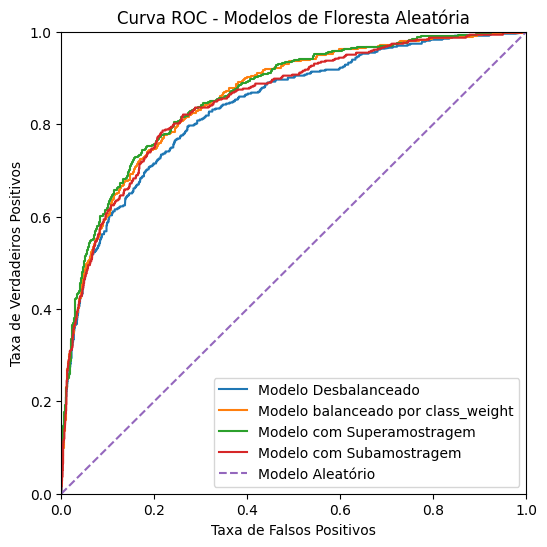

In [508]:
plot_roc_curve(models=probabilities_rf.keys(), probabilities=probabilities_rf, target_valid=target_valid, model_labels=model_labels, title = 'Curva ROC - Modelos de Floresta Aleatória')


**Conclusões**

1. **Curva ROC - Modelos de Árvore de Decisão:**

- A curva ROC para os modelos de árvore de decisão mostra que, no geral, todos os modelos têm um desempenho relativamente semelhante.
- O modelo com superamostragem parece ter uma leve vantagem sobre os outros métodos, especialmente em uma parte da curva, mas a diferença é sutil.
- O modelo desbalanceado e o modelo balanceado com class_weight apresentam desempenho muito próximo.
- A linha tracejada representa um modelo aleatório, e todas as curvas estão claramente acima da linha, o que indica que os modelos têm um desempenho melhor que o aleatório.

2. **Curva ROC - Modelos de Regressão Logística:**

- No caso dos modelos de regressão logística, o modelo balanceado com class_weight parece ter uma vantagem clara sobre os outros, com uma curva que está consistentemente acima.
- O modelo desbalanceado e os modelos com superamostragem e subamostragem têm curvas muito próximas, mas todas estão abaixo da curva do modelo com class_weight.
- Isso sugere que o balanceamento com class_weight foi particularmente eficaz para a regressão logística, melhorando significativamente o desempenho.

3. **Curva ROC - Modelos de Floresta Aleatória:**

- Para os modelos de floresta aleatória, as curvas ROC são quase sobrepostas, indicando que todas as abordagens de balanceamento estão fornecendo resultados muito semelhantes.
- Isso pode ser um sinal de que a floresta aleatória, por sua natureza robusta, não é tão sensível ao desbalanceamento das classes quanto outros modelos, ou que as estratégias de balanceamento não fizeram uma diferença significativa.

# 5. Avaliação dos modelos

In [520]:
models_f1 = {'Logistic Regression Desbalanceado': f1_score(target_valid, predicted_valid_lr),
          'Logistic Regression Balanceado CW': f1_score(target_valid, predicted_valid_lr_blcd),
          'Logistic Regression Balanceado Superamostragem': f1_score(target_valid, predicted_valid_lr_upr),
          'Logistic Regression Balanceado Subamostragem':f1_score(target_valid, predicted_valid_lr_und),
          'Decision Tree Desbalanceado': f1_score(target_valid, predicted_valid_dt),
          'Decision Tree Balanceado CW': f1_score(target_valid, predicted_valid_dt_blcd),
          'Decision Tree Balanceado Superamostragem': f1_score(target_valid, predicted_valid_dt_upr),
          'Decision Tree Balanceado Subamostragem':f1_score(target_valid, predicted_valid_dt_und),
          'Random Forest Desbalanceado': f1_score(target_valid, predictions_valid_rf),
          'Random Forest Balanceado CW': f1_score(target_valid, predictions_valid_rf_blcd),
          'Random Forest Balanceado Superamostragem': f1_score(target_valid, predictions_valid_rf_upr),
          'Random Forest Balanceado Subamostragem':f1_score(target_valid, predictions_valid_rf_und)          
}

df_f1_score = pd.DataFrame(list(models_f1.items()), columns=['Modelo','F1-Score'])

df_f1_sorted = df_f1_score.sort_values(by= 'F1-Score', ascending=True)

<Figure size 1000x900 with 0 Axes>

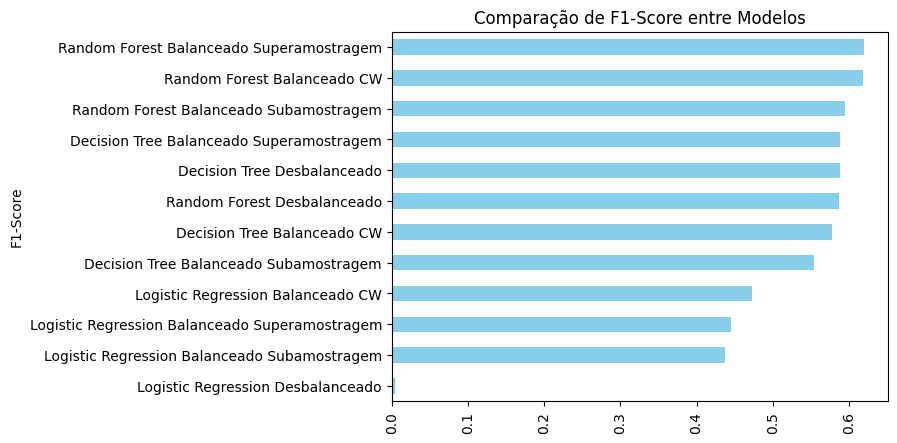

In [521]:
plt.figure(figsize=(10,9))
df_f1_sorted.plot(kind='barh', x='Modelo', y='F1-Score', legend=False, color='skyblue')

# Adicionando rótulos e título
plt.title('Comparação de F1-Score entre Modelos')
plt.ylabel('F1-Score')
plt.xticks(rotation=90)

# Exibindo o gráfico
plt.show()

**Conclusão Geral:**

- Random Forest foi o algoritmo que mais se beneficiou das técnicas de balanceamento, apresentando os melhores resultados em todos os métodos. A superamostragem se destacou como a técnica mais eficaz, mas class_weight também apresentou bons resultados.

- Árvore de Decisão teve um bom desempenho geral, especialmente com a superamostragem e, em menor grau, com o modelo desbalanceado.

- Regressão Logística teve o desempenho mais baixo, embora o balanceamento com class_weight tenha mostrado alguma melhora. Isso sugere que este modelo é menos adequado para esse conjunto de dados ou para os desequilíbrios nas classes.

**O modelo escolhido para realizar o teste foi o modelo de Random Forest com Superamostragem**

# 6. Teste do Modelo com melhor F1

In [524]:
predictions_test_rf_upr = model_rf_upr.predict(features_test)

metrics_validation(target_test, predictions_test_rf_upr)

O valor de acurácia do modelo é de: 0.8244444444444444
O valor de precisão do modelo é de: 0.570446735395189
O valor de sensibilidade do modelo é de: 0.6960167714884696
O valor de f1 do modelo é de: 0.6270066100094429


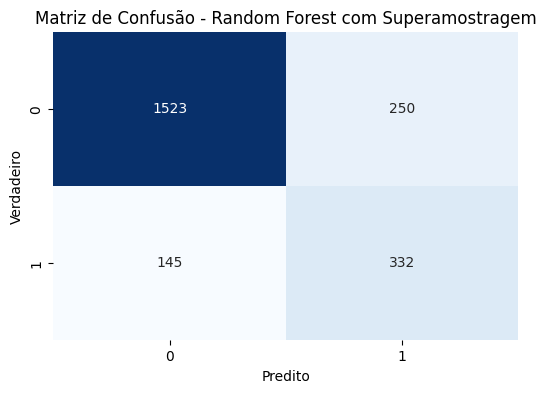

In [532]:
# Calculando a matriz de confusão
cm = confusion_matrix(target_test, predictions_test_rf_upr)

# Plotando a matriz de confusão
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Adicionando rótulos e título
plt.title('Matriz de Confusão - Random Forest com Superamostragem')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')

# Exibindo o gráfico
plt.show()

- O modelo de Random Forest com superamostragem apresentou uma acurácia de 82,4%, o que indica que ele consegue classificar corretamente a maioria dos exemplos no conjunto de teste. No entanto, a precisão de 57% mostra que o modelo ainda comete uma quantidade significativa de falsos positivos, ou seja, está classificando erroneamente muitos exemplos da classe 0 como sendo da classe 1.

- A sensibilidade de 69,6% reflete a capacidade do modelo de capturar a maioria dos exemplos da classe positiva (classe 1), o que significa que ele está encontrando a maioria dos verdadeiros positivos, mas ainda está perdendo alguns exemplos, como evidenciado pelos falsos negativos.

- O F1-score de 62,7% indica um desempenho equilibrado, mas não ideal. O modelo consegue capturar bem a classe minoritária, porém, o custo de muitos falsos positivos afeta sua precisão geral.

- A matriz de confusão reforça essas observações: enquanto o modelo faz um bom trabalho ao identificar a maioria dos negativos corretamente, ele ainda enfrenta desafios em distinguir corretamente a classe positiva, cometendo alguns erros em ambas as direções (falsos positivos e falsos negativos).

# 7. Conclusões Gerais

## Carregamento e Tratamento de Dados

- Os dados foram carregados sem maiores problemas.

- Foi necessário excluir algumas colunas e modificar outras para que ficassem no padrão em que os modelos de machine learning aceitam

- Algumas linhas foram excluidas, o que significou a retirada de 9% dos dados originais.

## Análise de Equilíbrio de Classes

- Os dados foram divididos na proporção 50:25:25 (treinamento:validação:teste)

- Os testes com as classes desbalanceadas mostrou que o modelo de regressão logística ainda requer muitas melhorias

- O melhor modelo foi o de floresta aleatória, provavelmente pela robustez do modelo.

## Análise de Equilíbrio de Classes Balanceadas

- O balanceamento de classes por class_weight mostrou uma boa evolução no impacto de f1.

- Os modelos com superamostragem foram os que apresentaram as melhores métricas

- Novamente os modelos de floresta aleatória foram os que apresentaram as melhores métricas.

## Análise de Curva ROC

- **Árvore de Decisão**: O uso de superamostragem parece fornecer uma leve vantagem, embora as diferenças entre os modelos sejam pequenas.

- **Regressão Logística**: O balanceamento com class_weight é o que mais se destaca, melhorando claramente o desempenho em comparação com os outros métodos.

- **Floresta Aleatória**: Não há uma diferença significativa entre as diferentes estratégias de balanceamento, com todas as curvas sendo bastante semelhantes.

## Comparação dos Modelos

- Os modelos de regressão logística tiveram os menores F1-scores em comparação com os outros algoritmos.

- Entre os modelos de árvore de decisão, a superamostragem novamente se destacou, obtendo o melhor F1-score entre as variações testadas.

- Os modelos de Random Forest apresentam os melhores F1-scores gerais, com a superamostragem sendo o método mais eficaz. Isso sugere que este modelo lida muito bem com a superamostragem para melhorar a detecção da classe minoritária.

## Teste do Modelo com melhor F1

O modelo de Random Forest com superamostragem demonstrou um desempenho sólido com uma acurácia de 82.4%, o que é positivo. No entanto, as métricas de precisão e F1-score mostram que o modelo ainda apresenta uma quantidade considerável de falsos positivos e falsos negativos, especialmente em relação à precisão, que ficou em 57%. A sensibilidade de 69.6% mostra que o modelo consegue capturar bem a maioria dos exemplos positivos.